# Example 02: CIFAR-10 Demo

In [6]:
import sys
sys.path.append('./../')
import matplotlib
%matplotlib inline
import visualisation

## (i) Train an ANT on the CIFAR-10 image recognition dataset
From the code directory, run the following command to train an ANT:

```bash
python tree.py --dataset cifar10 \ # dataset
               --experiment demo --subexperiment ant_cifar10 \ # experiment names
               --batch-size 512 --epochs_patience 5 \ # training
               --epochs_node 100 --epochs_finetune 200 \
               --scheduler step_lr --augmentation_on \
               -t_ver 5 -t_k 3 -t_ngf 96 \ # transformer module config
               -r_ver 3 -r_ngf 48 -r_k 3 \ # router module config 
               -s_ver 6 \ # solver module config 
               --maxdepth 10 --batch_norm \ # other model config 
               --visualise_split --num_workers 0 --seed 0 # miscellaneous 
```

It takes less than 3 hours on a single Titan X GPU.

## (ii) Plot classification accuracy
The dotted lines correspond to the epoch number at which the refinement phase started. 

ant_cifar10: test accuracy = 90.19


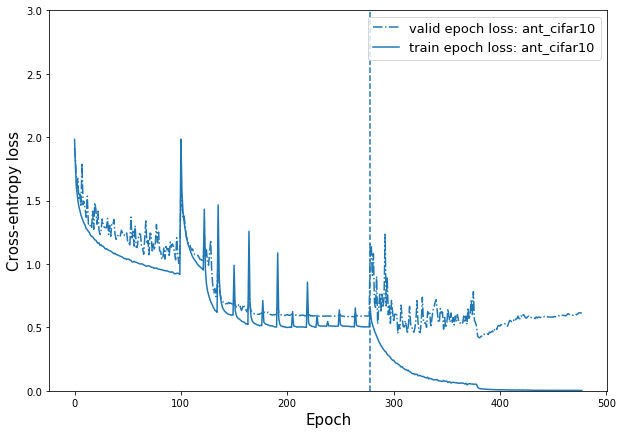

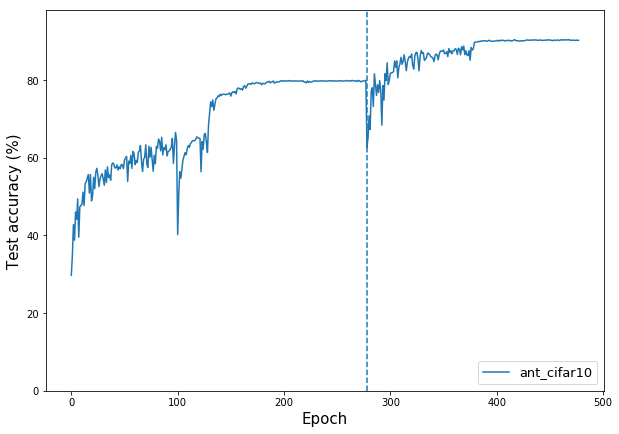

In [7]:
exp_dir = './../experiments/cifar10/demo/'
models_list = ['ant_cifar10']

records_file_list = [exp_dir + model_name + '/checkpoints/records.json' for model_name in models_list]
model_files = [exp_dir + model_name + '/checkpoints/model.pth' for model_name in models_list]

visualisation.plot_performance(records_file_list, models_list, ymax = 3.0, figsize=(10,7), finetune_position=True)
visualisation.plot_accuracy(records_file_list, models_list, figsize=(10,7), ymin=0, ymax=98, finetune_position=True)

## (iii) Compute model size

In [8]:
_ = visualisation.compute_number_of_params(model_files, models_list, is_gpu=False)


Model: ant_cifar10
Number of parameters summary:
    Total: 966412 
    Max per branch: 773533 
    Min per branch: 711180 
    Average per branch: 764625.428571


## (iv) Visualise the tree structure

     Plotting:  hist_split_node_finetune.png


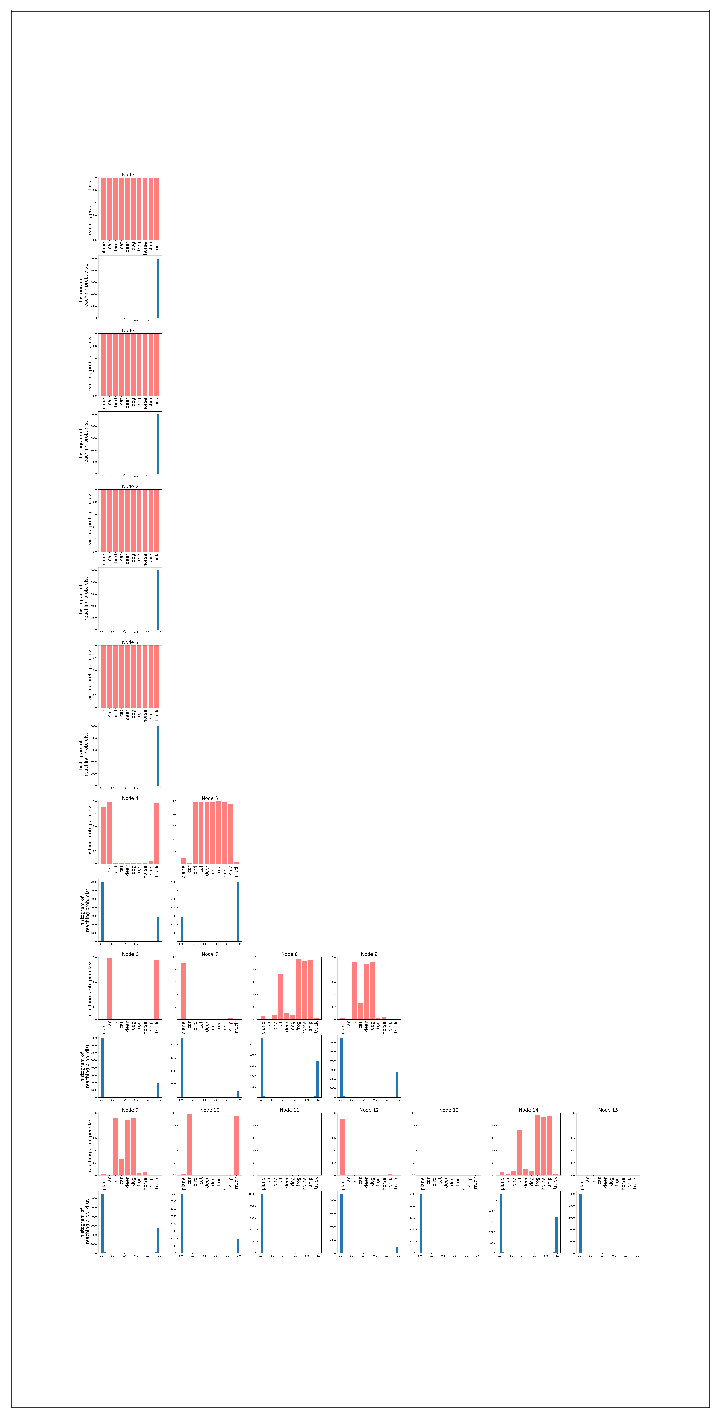

In [9]:
fig_dir = exp_dir + 'ant_cifar10' + '/figures/'
visualisation.visualise_treestructures(fig_dir, figsize=(10,20))